<a href="https://colab.research.google.com/github/lorenzlorg/MSc-Thesis-CV/blob/main/3_GIS_Analysis_point_pattern_analysis_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**POINT PATTERN ANALYSIS**

Questo notebbok a partire delle detection georeferenziate ottenute nel notebook precedente serve per eseguire delle analisi per identificare dei pattern nella distribuzione dei punti (detection dei pedoni).

Sono state provate diverse librerie.

References:
- https://darribas.org/gds_course/content/bH/lab_H.html

# Lettura griglia

In [ ]:
!apt-get update && apt-get install texlive texlive-latex-extra texlive-fonts-recommended dvipng cm-super -y

Ign:1 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  Release
Get:4 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:5 http://archive.ubuntu.com/ubuntu focal InRelease
Get:6 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Get:9 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Get:11 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:13 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [1,013 kB]
Get:14 http://archive.ubuntu.com/ubun

In [ ]:
!pip install geopandas
import geopandas as gpd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 85.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 78.9 MB/s eta 0:00:00


In [ ]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [ ]:
# grid
%cd /content/drive/MyDrive/grid
grid_duomo = gpd.read_file('Griglia_2m-SS.shp')  # carico i file griglia

# in alternativa
# grid
# !pip install scikit-mobility
# from skmob.tessellation.tilers import tiler
# from skmob.utils.plot import plot_gdf
# tess_squared = tiler.get('squared', base_shape='Piazza Duomo, Italy', meters=10, crs = 'epsg:32632')
# print("tiles = %s" %len(tess_squared))
# tess_squared.head()

%cd ..
%cd ..
%cd ..

grid_duomo

/content/drive/MyDrive/grid
/content/drive/MyDrive
/content/drive
/content


,Depthmap_R,id,geometry
0,5767220,0,"POLYGON ((514729.000 5034415.000, 514729.000 5..."
1,5832756,1,"POLYGON ((514731.000 5034415.000, 514731.000 5..."
2,5898292,2,"POLYGON ((514733.000 5034415.000, 514733.000 5..."
3,5963828,3,"POLYGON ((514735.000 5034415.000, 514735.000 5..."
4,6029364,4,"POLYGON ((514737.000 5034415.000, 514737.000 5..."
...,...,...,...
7282,11665575,7282,"POLYGON ((514909.000 5034645.000, 514909.000 5..."
7283,11731111,7283,"POLYGON ((514911.000 5034645.000, 514911.000 5..."
7284,11796647,7284,"POLYGON ((514913.000 5034645.000, 514913.000 5..."
7285,11862183,7285,"POLYGON ((514915.000 5034645.000, 514915.000 5..."


# Lettura dataset

In [ ]:
# 07.59
df_geopandas = gpd.read_feather("/content/drive/MyDrive/detections_YOLOv7_SORT/milan_2021-07-15_07_59_31/Copia di detection_milan_2021-07-15_07_59_31_hour.feather")  
datetime_detection = '(08:00 - 08:30)'
hour_label = '8'

# 10.59
# df_geopandas = gpd.read_feather("/content/drive/MyDrive/detections_YOLOv7_SORT/milan_2021-07-15_10_59_31/Copia di detection_milan_2021-07-15_10_59_31_hour.feather")  
# datetime_detection = '(11:00 - 11:30)'
# hour_label = '11'

# 12.44
# df_geopandas = gpd.read_feather("/content/drive/MyDrive/detections_YOLOv7_SORT/milan_2021-07-15_12_44_31/Copia di detection_milan_2021-07-15_12_44_31_hour.feather") 
# datetime_detection = '(12:45 - 13:15)'
# hour_label = '12'

# 14.59
# df_geopandas = gpd.read_feather("/content/drive/MyDrive/detections_YOLOv7_SORT/milan_2021-07-15_14_59_31/Copia di detection_milan_2021-07-15_14_59_31_hour.feather") 
# datetime_detection = '(15:00 - 15:30)'
# hour_label = '15'

# 17.59
# df_geopandas = gpd.read_feather("/content/drive/MyDrive/detections_YOLOv7_SORT/milan_2021-07-15_17_59_31/Copia di detection_milan_2021-07-15_17_59_31_hour.feather")  
# datetime_detection = '(18:00 - 18:30)'
# hour_label = '18'

df_geopandas.head()

,frame,id,class,time,geometry,lon,lat
0,1,0,0,2021-07-15 07:59:31,POINT (514785.437 5034541.019),514785.436647,5.034541e+06
1,1,1,0,2021-07-15 07:59:31,POINT (514803.842 5034561.403),514803.841525,5.034561e+06
2,1,2,0,2021-07-15 07:59:31,POINT (514828.381 5034566.152),514828.381362,5.034566e+06
3,1,3,0,2021-07-15 07:59:31,POINT (514806.216 5034555.861),514806.216348,5.034556e+06
4,1,4,0,2021-07-15 07:59:31,POINT (514787.614 5034505.396),514787.613568,5.034505e+06


In [ ]:
df_geopandas['id'].nunique()

54407

# Eliminazione punti outliers sulla base dei valori di x e y

In [ ]:
df_geopandas = df_geopandas[df_geopandas['lon'] < 514950]

# elimino cosi gli outlier

In [ ]:
len(df_geopandas)

2351050

In [ ]:
df_geopandas['id'].nunique()

54386

# Cumulate e Medie mobili

In [ ]:
# calcolo curva ogni 5 min

In [ ]:
import pandas as pd
points = df_geopandas[['lon', 'lat', 'geometry', 'id', 'frame']]
points = points.rename(columns={'lon': 'x', 'lat': 'y'})

min_list = list(range(1,points['frame'].max()+1))  # versione originale: range(1,27862)
def duplicate(testList, n):
  return [ele for ele in testList for _ in range(n)]


min_lsit_new = duplicate(min_list,900)
zed = pd.DataFrame(min_lsit_new)


# devo selezionare però solo fino a 30
frame_list = list(range(1,points['frame'].max()+1))
t = min_lsit_new[:len(frame_list)]

z = pd.DataFrame({'frame': frame_list})
z['min'] = t

points_new = points.merge(z, on='frame', how='left')
points_new





list_min = [5, 10, 15, 20, 25, 31]
list_counts = []
import pandas as pd
from geopandas.tools import sjoin

for i in list_min:
  df_temp = points_new[points_new['min'] <= i]
  list_counts.append(df_temp['id'].nunique())
  
list_counts




from matplotlib import pyplot as plt
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fig, ax = plt.subplots(figsize=(20, 13))


plt.plot(list_min, list_counts)
plt.scatter(list_min, list_counts, color='red')

plt.title('Cumulative Pedestrian Count', fontsize=30)
plt.xlabel('Time (min)', fontsize=30)
plt.ylabel('Number of pedestrians', fontsize=30)

ax.tick_params(axis='x', labelsize=15) 
ax.tick_params(axis='y', labelsize=15)

,x,y,geometry,id,frame,min
0,514776.926865,5.034537e+06,POINT (514776.927 5034537.259),0,1,1
1,514807.007956,5.034514e+06,POINT (514807.008 5034514.104),1,1,1
2,514779.103786,5.034534e+06,POINT (514779.104 5034534.290),2,1,1
3,514787.811470,5.034516e+06,POINT (514787.811 5034516.281),3,1,1
4,514788.603078,5.034517e+06,POINT (514788.603 5034516.677),4,1,1
...,...,...,...,...,...,...
9691769,514853.514905,5.034473e+06,POINT (514853.515 5034473.336),268167,27888,31
9691770,514860.243570,5.034568e+06,POINT (514860.244 5034567.538),268168,27888,31
9691771,514860.837276,5.034568e+06,POINT (514860.837 5034568.329),268169,27888,31
9691772,514859.451963,5.034565e+06,POINT (514859.452 5034564.569),268170,27888,31


In [ ]:
fig.savefig('test_cumulate.png', dpi=300, bbox_inches='tight')

In [ ]:
# numero pedio di pedoni
import pandas as pd
count_ped_frame = pd.DataFrame({'frame': df_geopandas['frame'].unique()})
count_ped_frame['count'] = list(df_geopandas.groupby('frame')['id'].nunique())
count_ped_frame

,frame,count
0,1,283
1,2,294
2,3,312
3,4,326
4,5,333
...,...,...
27883,27884,341
27884,27885,345
27885,27886,341
27886,27887,340


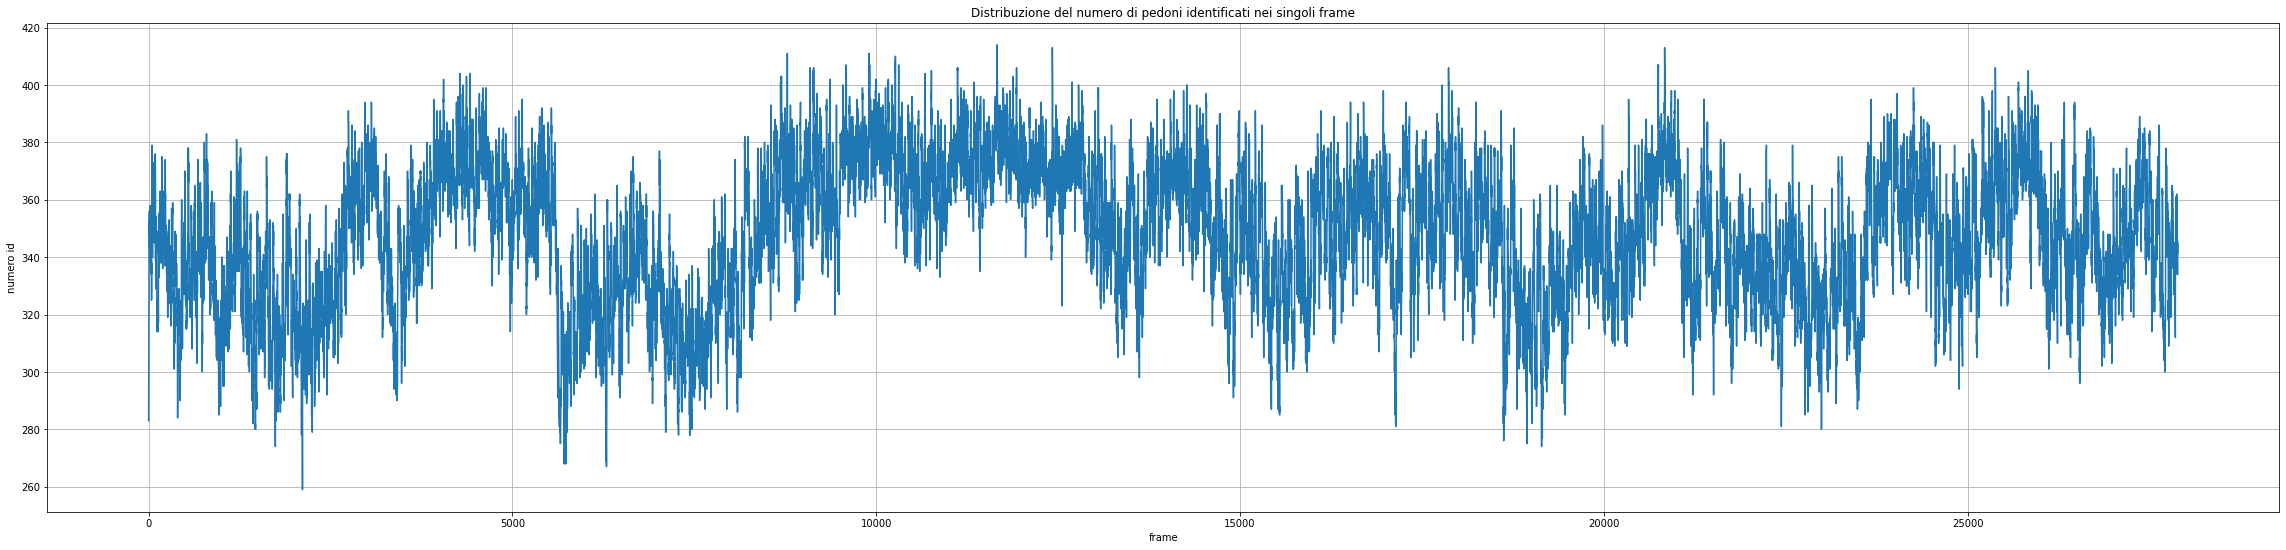

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

t = df_geopandas.groupby('frame')['id'].nunique().index
s =  df_geopandas.groupby('frame')['id'].nunique().values

ax.plot(t, s)

ax.set(xlabel='frame', ylabel='numero id')
ax.grid()

width = 40
height = 9
fig.set_size_inches(width, height)


#specify x-axis locations
# x_tickss = x_ticks[::100]
# x_labelss = x_labels[::100]

# #add x-axis values to plot
# plt.xticks(ticks=x_tickss, labels=x_labelss)

plt.title('Distribuzione del numero di pedoni identificati nei singoli frame')
plt.show()

# sull'asse x abbiamo i frame che corrispondono ad un certo orario come presentato nel grafico sotto

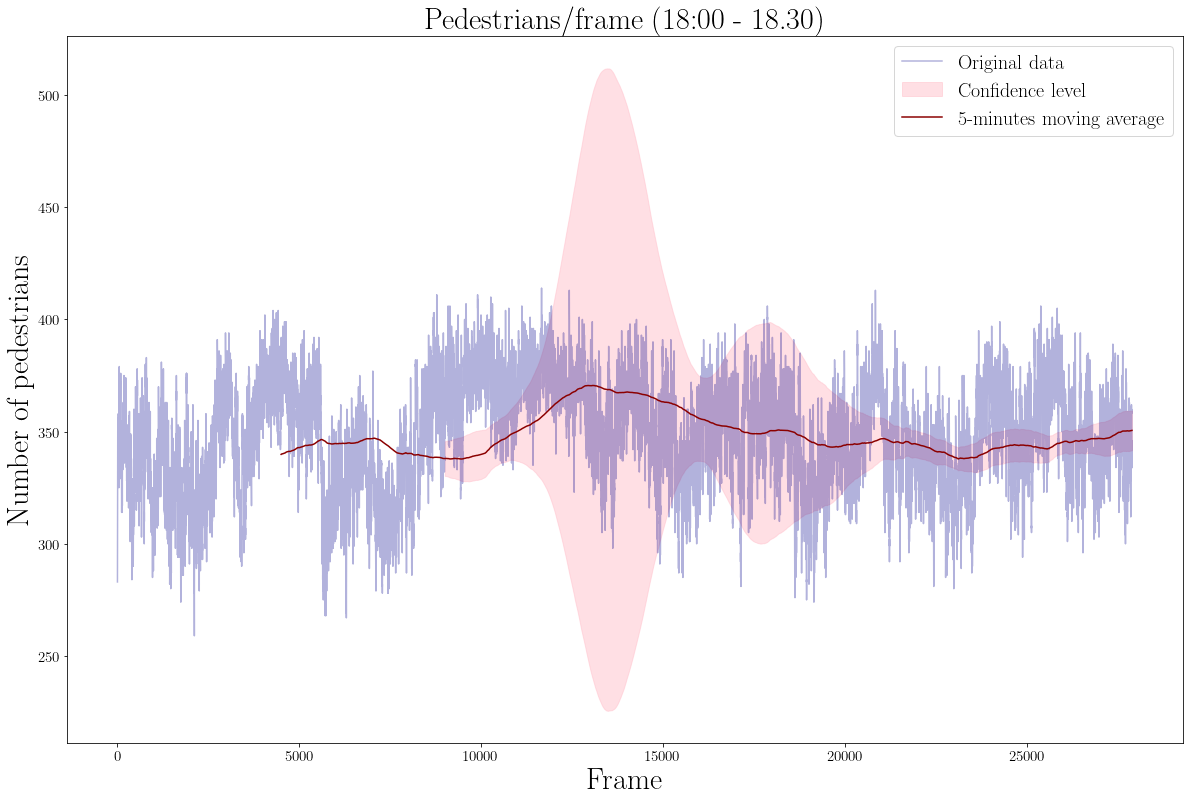

In [ ]:
df = pd.DataFrame({'Time': t, 'Count': s})
df['fivemin_rolling_mean'] = df.Count.rolling(4500).mean()
df['fivemin_rolling_var'] = df.fivemin_rolling_mean.rolling(4500).var()


import pandas as pd
import matplotlib.pyplot as plt

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

rolling_mean = df['fivemin_rolling_mean']
rolling_var = df['fivemin_rolling_var']

# Crea la figura e l'asse
fig, ax = plt.subplots(figsize=(20, 13))

# Plotta i dati originali
ax.plot(df['Count'], color='#00008B', alpha=0.3, label='Original data')

# Plotta la banda di varianza
ax.fill_between(df['Time'], rolling_mean - rolling_var, rolling_mean + rolling_var, color='#FFC0CB', alpha=0.5, label='Confidence level')

# Plotta la media mobile
ax.plot(rolling_mean, color='#8B0000', label='5-minutes moving average')


# Aggiungi la legenda
ax.legend(fontsize=20)


# Aggiungi le label degli assi e il titolo
ax.set_xlabel('Frame', fontsize=30)
ax.set_ylabel('Number of pedestrians', fontsize=30)
ax.set_title('Pedestrians/frame (18:00 - 18.30)', fontsize=30)


ax.tick_params(axis='x', labelsize=15) 
ax.tick_params(axis='y', labelsize=15)


# Mostra il grafico
plt.show()

In [ ]:
fig.savefig('test_ma.png', dpi=300, bbox_inches='tight')

In [ ]:
# ---> tentativo #1
# list_min = [5, 10, 15, 20, 25, 31]
# list_counts = []
# import pandas as pd
# from geopandas.tools import sjoin

# # for i in list_min:
# #   df_temp = points_new[points_new['min'] <= i]
# #   list_counts.append(df_temp['id'].nunique())
  
# # list_counts

# history = {}  # dizionario per mantenere lo storico degli ID

# # loop per scorrere ogni minuto
# for i in list_min:

#     df_temp = points_new[points_new['min'] <= i]
#     list_counts.append(df_temp['id'].nunique())


#     current_ids = df_temp['id'].unique().tolist()  # lista di ID del minuto corrente, da sostituire con i dati reali
    
# # calcolo le differenze tra i set di ID del minuto corrente e del minuto precedente
#     if i > 1:
#         if i-5 in history:
#             lost_ids = len(history[i-5] - set(current_ids))
#         else:
#             lost_ids = 0
#         new_ids = len(set(current_ids) - history.get(i-5, set()))
#         unchanged_ids = len(current_ids) - lost_ids - new_ids
#     else:
#         lost_ids, new_ids, unchanged_ids = 0, 0, len(current_ids)
    
#     # aggiorno lo storico degli ID
#     history[i] = set(current_ids)
    
#     if i % 5 == 0 or i == 1:
#       print(f"Minuto {i}: Persi={lost_ids}, Aggiunti={new_ids}, Mantenuti={unchanged_ids}")

# ---> tentativo #2
# sicuramente è giusto che ne aggiunge circa 40k ogni 5 min
# history = {}  # dizionario per mantenere lo storico degli ID
# minutes = [5, 10, 15, 20, 25, 30]  # lista dei minuti di interesse

# # loop per scorrere ogni minuto
# for i in minutes:
#     current_ids = points_new[points_new['min'] <= i]['id'].unique().tolist()
    
#     # calcolo le differenze tra i set di ID del minuto corrente e del minuto precedente
#     if i > 5:
#         if i-5 in history:
#             lost_ids = len(history[i-5]-set(points_new[(points_new['min'] > i-5) & (points_new['min'] <= i)]['id'].unique().tolist()))  # elementi del minuto i-5 e elmenti del minuto i fino a >i-5 (ovvero quanti id ha aggiunto nella fase da i-1 a i, da 5min a 10min)
#         else:
#             lost_ids = 0
#         new_ids = len(set(current_ids) - history[i-5])
#         unchanged_ids = len(set(current_ids) & set(history[i-5]))
#     else:
#         lost_ids, new_ids, unchanged_ids = 0, len(current_ids), 0
    
#     # aggiorno lo storico degli ID
#     history[i] = set(current_ids)
    
#     # stampo i risultati per il minuto corrente
#     print(f"Minuto {i}: Persi={lost_ids}, Aggiunti={new_ids}, Mantenuti={unchanged_ids}")  # non perdo nulla perchè con <= riprendo tutto ciò che c'era precedentemente

# Occupancy: ped/min

Le celle vengono considerate come dei contenitori  

In [ ]:
df_geopandas.head()

,frame,id,class,time,geometry,lon,lat
0,1,0,0,2021-07-15 07:59:31,POINT (514785.437 5034541.019),514785.436647,5.034541e+06
1,1,1,0,2021-07-15 07:59:31,POINT (514803.842 5034561.403),514803.841525,5.034561e+06
2,1,2,0,2021-07-15 07:59:31,POINT (514828.381 5034566.152),514828.381362,5.034566e+06
3,1,3,0,2021-07-15 07:59:31,POINT (514806.216 5034555.861),514806.216348,5.034556e+06
4,1,4,0,2021-07-15 07:59:31,POINT (514787.614 5034505.396),514787.613568,5.034505e+06


In [ ]:
grid_duomo.head()

,Depthmap_R,id,geometry
0,5767220,0,"POLYGON ((514729.000 5034415.000, 514729.000 5..."
1,5832756,1,"POLYGON ((514731.000 5034415.000, 514731.000 5..."
2,5898292,2,"POLYGON ((514733.000 5034415.000, 514733.000 5..."
3,5963828,3,"POLYGON ((514735.000 5034415.000, 514735.000 5..."
4,6029364,4,"POLYGON ((514737.000 5034415.000, 514737.000 5..."


<AxesSubplot:>

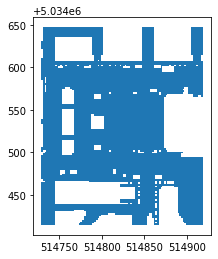

In [ ]:
grid_duomo.plot()  # tutte le cella di tutta la griglia

In [ ]:
# counting how many points in each grid with spatial join
import pandas as pd
from geopandas.tools import sjoin
pointInPolys = sjoin(df_geopandas, grid_duomo, how='inner') 
pointInPolys_df = pd.DataFrame(data=pointInPolys)
pointInPolys_df

# con "inner" join si considerano solo le celle che hanno almeno una detection e tutte 
# le detection che ricadono in una delle celle della griglia (è possibile che alcune 
# detection siano fuori dalla griglia ma in quel caso saranno detection che non ci interessano)

,frame,id_left,class,time,geometry,lon,lat,index_right,Depthmap_R,id_right
0,1,0,0,2021-07-15 07:59:31.000,POINT (514785.437 5034541.019),514785.436647,5.034541e+06,4058,7602291,4058
58,2,0,0,2021-07-15 07:59:31.070,POINT (514785.437 5034541.019),514785.436647,5.034541e+06,4058,7602291,4058
117,3,0,0,2021-07-15 07:59:31.140,POINT (514785.041 5034541.019),514785.040843,5.034541e+06,4058,7602291,4058
72639,1126,1634,0,2021-07-15 08:00:49.750,POINT (514786.426 5034542.998),514786.426157,5.034543e+06,4058,7602291,4058
72699,1127,1634,0,2021-07-15 08:00:49.820,POINT (514786.228 5034542.998),514786.228255,5.034543e+06,4058,7602291,4058
...,...,...,...,...,...,...,...,...,...,...
2349158,27851,54354,0,2021-07-15 08:32:00.500,POINT (514830.162 5034478.878),514830.162479,5.034479e+06,1776,9044051,1776
2349245,27852,54354,0,2021-07-15 08:32:00.570,POINT (514830.162 5034478.878),514830.162479,5.034479e+06,1776,9044051,1776
2349332,27853,54354,0,2021-07-15 08:32:00.640,POINT (514830.162 5034478.878),514830.162479,5.034479e+06,1776,9044051,1776
2349415,27854,54354,0,2021-07-15 08:32:00.710,POINT (514830.162 5034478.878),514830.162479,5.034479e+06,1776,9044051,1776


<AxesSubplot:>

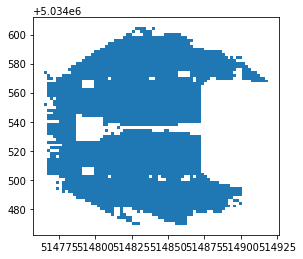

In [ ]:
grid_duomo[grid_duomo['id'].isin(pointInPolys_df['id_right'])].plot()  
# sono le sole celle della griglia che considero, ovvero quello che hanno almeno una detection (inner join)

In [ ]:
# conto in ogni cella il numero di id univoci -> raggruppo per id cella e conto il numero di pedoni univoci
# id_right: id cella
# id_left: id pedone
grid_count = pointInPolys_df.groupby(['id_right'])['id_left'].nunique().reset_index(name='unique_id_count').sort_values(by=['unique_id_count'], ascending=False)
grid_count

,id_right,unique_id_count
92,1875,479
2476,5244,455
2374,5096,448
596,2717,443
597,2718,442
...,...,...
2380,5115,1
1311,3641,1
1160,3463,1
1111,3402,1


In [ ]:
grid_count['unique_id_count'].mean(skipna=True)

57.72522673832717

In [ ]:
grid_count['unique_id_count'].sum()

171848

In [ ]:
grid_count['unique_id_count'].max()

479

In [ ]:
grid_count['unique_id_count'].min()

1

<AxesSubplot:>

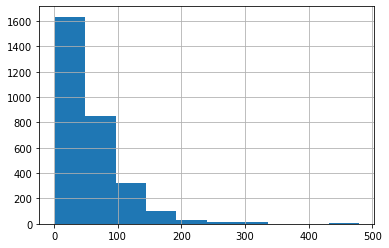

In [ ]:
grid_count['unique_id_count'].hist()

In [ ]:
# associamo nuovamente le coordinate spaziali alle celle sulla base del loro id_right 
grid_count_geom = grid_count.merge(grid_duomo, left_on='id_right', right_on='id')
grid_count_geom

,id_right,unique_id_count,Depthmap_R,id,geometry
0,1875,479,9437268,1875,"POLYGON ((514841.000 5034479.000, 514841.000 5..."
1,5244,455,9961604,5244,"POLYGON ((514857.000 5034575.000, 514857.000 5..."
2,5096,448,11403394,5096,"POLYGON ((514901.000 5034571.000, 514901.000 5..."
3,2717,443,9896029,2717,"POLYGON ((514855.000 5034497.000, 514855.000 5..."
4,2718,442,9961565,2718,"POLYGON ((514857.000 5034497.000, 514857.000 5..."
...,...,...,...,...,...
2972,5115,1,6946947,5115,"POLYGON ((514765.000 5034573.000, 514765.000 5..."
2973,3641,1,10354795,3641,"POLYGON ((514869.000 5034525.000, 514869.000 5..."
2974,3463,1,7077993,3463,"POLYGON ((514769.000 5034521.000, 514769.000 5..."
2975,3402,1,7274600,3402,"POLYGON ((514775.000 5034519.000, 514775.000 5..."


In [ ]:
# occupancy_8 = grid_count_geom.loc[:, ['id_right', 'unique_id_count']].rename(columns={'unique_id_count': 'unique_id_count_8'})
# occupancy_8
# occupancy_8.to_csv('occupancy_8.csv', index=False)
# !cp /content/occupancy_8.csv /content/drive/MyDrive/dataframe_points/occupancy_plot

# occupancy_11 = grid_count_geom.loc[:, ['id_right', 'unique_id_count']].rename(columns={'unique_id_count': 'unique_id_count_11'})
# occupancy_11
# occupancy_11.to_csv('occupancy_11.csv', index=False)
# !cp /content/occupancy_11.csv /content/drive/MyDrive/dataframe_points/occupancy_plot

# occupancy_12 = grid_count_geom.loc[:, ['id_right', 'unique_id_count']].rename(columns={'unique_id_count': 'unique_id_count_12'})
# occupancy_12
# occupancy_12.to_csv('occupancy_12.csv', index=False)
# !cp /content/occupancy_12.csv /content/drive/MyDrive/dataframe_points/occupancy_plot

# occupancy_15 = grid_count_geom.loc[:, ['id_right', 'unique_id_count']].rename(columns={'unique_id_count': 'unique_id_count_15'})
# occupancy_15
# occupancy_15.to_csv('occupancy_15.csv', index=False)
# !cp /content/occupancy_15.csv /content/drive/MyDrive/dataframe_points/occupancy_plot

# occupancy_18 = grid_count_geom.loc[:, ['id_right', 'unique_id_count']].rename(columns={'unique_id_count': 'unique_id_count_18'})
# occupancy_18
# occupancy_18.to_csv('occupancy_18.csv', index=False)
# !cp /content/occupancy_18.csv /content/drive/MyDrive/dataframe_points/occupancy_plot

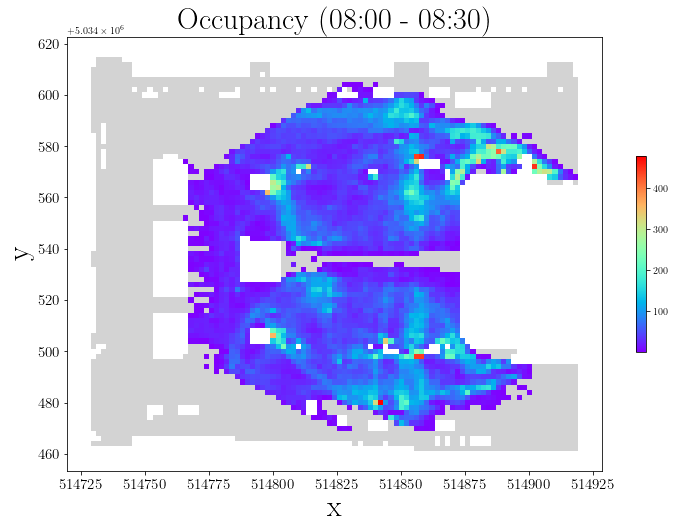

In [ ]:
import numpy as np

# grid_count_geom['count_log'] = np.log(grid_count_geom['unique_id_count'])

# conversione in geo dataframe
grid_count_geom = gpd.GeoDataFrame(grid_count_geom, 
                          crs = 'epsg:32632', 
                          geometry = grid_count_geom['geometry'])
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
# fig = plt.figure(figsize=(12, 12))

fig, ax = plt.subplots(figsize = (12,12))
# plotto la grid Duomo
grid_duomo[1150:6700].to_crs(epsg=32632).plot(ax=ax, color='lightgrey')

# plotto per ogni cella il relativo conteggio utilizzando una scala colori
grid_count_geom.plot(column = 'unique_id_count',  # eventualmente si puà utilizzare la scala logaritmica
                     ax=ax, 
                     cmap = 'rainbow',
                     legend = True, 
                     legend_kwds={'shrink': 0.3}, 
                     markersize = 10)

plt.title('Occupancy {}'.format(datetime_detection), fontsize=30)
plt.xlabel('x', fontsize=30)
plt.ylabel('y', fontsize=30)

# Get the axes object
ax = plt.gca()

# Set the tick font size
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

plt.show()

In [ ]:
fig.savefig('occupancy_{}.png'.format(hour_label), dpi=300, bbox_inches='tight')

In [ ]:
# OCCUPANCY 

print('Occupancy (Pedoni/minuto)\nMedia: {}\nDeviazione Standard: {}'.format(round(grid_count_geom['unique_id_count'].mean(), 3),
                                                                  round(grid_count_geom['unique_id_count'].std(), 3)
    ))

Occupancy (Pedoni/minuto)
Media: 241.459
Deviazione Standard: 166.982


# Density: ped/m^2

Misura statica  
Le celle sono 4m^2, si dovrà dividere per 4

In [ ]:
df_geopandas.head()

,frame,id,class,time,geometry,lon,lat
0,1,0,0,2021-07-15 17:59:31,POINT (514776.927 5034537.259),514776.926865,5.034537e+06
1,1,1,0,2021-07-15 17:59:31,POINT (514807.008 5034514.104),514807.007956,5.034514e+06
2,1,2,0,2021-07-15 17:59:31,POINT (514779.104 5034534.290),514779.103786,5.034534e+06
3,1,3,0,2021-07-15 17:59:31,POINT (514787.811 5034516.281),514787.811470,5.034516e+06
4,1,4,0,2021-07-15 17:59:31,POINT (514788.603 5034516.677),514788.603078,5.034517e+06


In [ ]:
grid_duomo.head()

,Depthmap_R,id,geometry
0,5767220,0,"POLYGON ((514729.000 5034415.000, 514729.000 5..."
1,5832756,1,"POLYGON ((514731.000 5034415.000, 514731.000 5..."
2,5898292,2,"POLYGON ((514733.000 5034415.000, 514733.000 5..."
3,5963828,3,"POLYGON ((514735.000 5034415.000, 514735.000 5..."
4,6029364,4,"POLYGON ((514737.000 5034415.000, 514737.000 5..."


In [ ]:
# counting how many points in each grid with spatial join
import pandas as pd
from geopandas.tools import sjoin
pointInPolys = sjoin(df_geopandas, grid_duomo, how='inner') 
pointInPolys_df = pd.DataFrame(data=pointInPolys)
pointInPolys_df

,frame,id_left,class,time,geometry,lon,lat,index_right,Depthmap_R,id_right
0,1,0,0,2021-07-15 17:59:31.000,POINT (514776.927 5034537.259),514776.926865,5.034537e+06,3941,7274609,3941
577,3,0,0,2021-07-15 17:59:31.140,POINT (514776.927 5034537.259),514776.926865,5.034537e+06,3941,7274609,3941
889,4,0,0,2021-07-15 17:59:31.210,POINT (514776.927 5034537.259),514776.926865,5.034537e+06,3941,7274609,3941
1215,5,0,0,2021-07-15 17:59:31.280,POINT (514776.927 5034537.259),514776.926865,5.034537e+06,3941,7274609,3941
1548,6,0,0,2021-07-15 17:59:31.350,POINT (514776.927 5034537.061),514776.926865,5.034537e+06,3941,7274609,3941
...,...,...,...,...,...,...,...,...,...,...
9677277,27846,267688,0,2021-07-15 18:32:00.150,POINT (514776.135 5034499.064),514776.135257,5.034499e+06,2750,7274590,2750
9677607,27847,267688,0,2021-07-15 18:32:00.220,POINT (514776.135 5034499.064),514776.135257,5.034499e+06,2750,7274590,2750
9677935,27848,267688,0,2021-07-15 18:32:00.290,POINT (514776.135 5034499.064),514776.135257,5.034499e+06,2750,7274590,2750
9678259,27849,267688,0,2021-07-15 18:32:00.360,POINT (514776.135 5034499.064),514776.135257,5.034499e+06,2750,7274590,2750


In [ ]:
# per ogni frame e per ogni cella voglio sapere il numero di pedoni univoci
# raggruppo per frame e per id cella (id_right) contanto per ogni gruppo ottenuto il numero di id unovoci di pedoni
result_grouped = pointInPolys_df.groupby(['frame', 'id_right'])['id_left'].nunique().reset_index(name='unique_id_count')
results_by_min = result_grouped.pivot_table(index='id_right', columns='frame', values='unique_id_count', fill_value=0)
results_by_min

frame,1,2,3,4,5,6,7,8,9,10,...,27879,27880,27881,27882,27883,27884,27885,27886,27887,27888
id_right,,,,,,,,,,,,,,,,,,,,,
1433,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1434,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1443,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1444,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6487,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6488,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6580,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
 # ora posso calcolare la media come media di tutte le colonne

results_by_min_with_mean = results_by_min.copy(deep=True)

# results_by_min_with_mean = results_by_min_with_mean.loc[:, results_by_min_with_mean.columns != "id_left"]
results_by_min_with_mean

frame,1,2,3,4,5,6,7,8,9,10,...,27879,27880,27881,27882,27883,27884,27885,27886,27887,27888
id_right,,,,,,,,,,,,,,,,,,,,,
1433,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1434,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1443,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1444,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6487,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6488,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6580,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# analizzo la distribuzione
results_by_min_with_mean.sort_values(by=results_by_min_with_mean.columns.tolist(), ascending=False)

frame,1,2,3,4,5,6,7,8,9,10,...,27879,27880,27881,27882,27883,27884,27885,27886,27887,27888
id_right,,,,,,,,,,,,,,,,,,,,,
2162,3,3,3,3,4,4,5,5,5,4,...,0,0,0,0,0,0,0,0,0,0
4673,3,3,3,3,4,4,4,2,2,2,...,0,0,0,0,0,0,0,0,0,0
3421,2,3,3,2,2,2,3,1,2,2,...,1,1,1,0,0,0,0,0,0,0
4665,2,2,3,2,2,3,3,3,3,2,...,0,0,0,0,0,0,0,0,0,0
4648,2,2,2,3,3,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3766,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3836,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5264,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# calcolo per ogni cella il valore medio considerando tutti i frame e divido per 4 
# dal momento in cui a noi interessa la densità su metro quadrato e noi abbiamo celle 2*2
results_by_min_with_mean['average'] = results_by_min_with_mean.mean(axis=1)/4
results_by_min_with_mean

frame,1,2,3,4,5,6,7,8,9,10,...,27880,27881,27882,27883,27884,27885,27886,27887,27888,average
id_right,,,,,,,,,,,,,,,,,,,,,
1433,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000269
1434,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000063
1435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000072
1443,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000018
1444,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6487,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000054
6488,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000215
6580,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000466


In [ ]:
# valore medio considerando tutte le celle
results_by_min_with_mean['average'].mean(skipna=True) 

0.027184159336965847

In [ ]:
test = pd.DataFrame({'id_cella': results_by_min_with_mean.index, 
                     'avg_num_pedoni': results_by_min_with_mean['average']}).sort_values(by='avg_num_pedoni', ascending=False)
test

# facendo inner join all'inizio vado a selezionare le sole celle che contengono 
# almeno una detection, poi nei vari frame ottengo tanti zeri

,id_cella,avg_num_pedoni
id_right,,
3534,3534,0.321975
3470,3470,0.301178
3535,3535,0.193192
3533,3533,0.187814
2892,2892,0.182328
...,...,...
3328,3328,0.000009
4168,4168,0.000009
5039,5039,0.000009


In [ ]:
grid_with_count_new = pd.DataFrame(test['avg_num_pedoni']).merge(grid_duomo, left_on=test['id_cella'], right_on='id')
grid_with_count_new

,avg_num_pedoni,Depthmap_R,id,geometry
0,0.321975,7536746,3534,"POLYGON ((514783.000 5034523.000, 514783.000 5..."
1,0.301178,7536745,3470,"POLYGON ((514783.000 5034521.000, 514783.000 5..."
2,0.193192,7602282,3535,"POLYGON ((514785.000 5034523.000, 514785.000 5..."
3,0.187814,7471210,3533,"POLYGON ((514781.000 5034523.000, 514781.000 5..."
4,0.182328,8388704,2892,"POLYGON ((514809.000 5034503.000, 514809.000 5..."
...,...,...,...,...
3024,0.000009,7077991,3328,"POLYGON ((514769.000 5034517.000, 514769.000 5..."
3025,0.000009,7078005,4168,"POLYGON ((514769.000 5034545.000, 514769.000 5..."
3026,0.000009,7274626,5039,"POLYGON ((514775.000 5034571.000, 514775.000 5..."
3027,0.000009,7012444,2598,"POLYGON ((514767.000 5034495.000, 514767.000 5..."


In [ ]:
# utile per plot generali

# density_8 = grid_with_count_new.loc[:, ['id', 'avg_num_pedoni']].rename(columns={'avg_num_pedoni': 'avg_num_pedoni_8'})
# density_8
# density_8.to_csv('density_8.csv', index=False)
# !cp /content/density_8.csv /content/drive/MyDrive/dataframe_points/density_plot

# density_11 = grid_with_count_new.loc[:, ['id', 'avg_num_pedoni']].rename(columns={'avg_num_pedoni': 'avg_num_pedoni_11'})
# density_11
# density_11.to_csv('density_11.csv', index=False)
# !cp /content/density_11.csv /content/drive/MyDrive/dataframe_points/density_plot

# density_12 = grid_with_count_new.loc[:, ['id', 'avg_num_pedoni']].rename(columns={'avg_num_pedoni': 'avg_num_pedoni_12'})
# density_12
# density_12.to_csv('density_12.csv', index=False)
# !cp /content/density_12.csv /content/drive/MyDrive/dataframe_points/density_plot

# density_15 = grid_with_count_new.loc[:, ['id', 'avg_num_pedoni']].rename(columns={'avg_num_pedoni': 'avg_num_pedoni_15'})
# density_15
# density_15.to_csv('density_15.csv', index=False)
# !cp /content/density_15.csv /content/drive/MyDrive/dataframe_points/density_plot

# density_18 = grid_with_count_new.loc[:, ['id', 'avg_num_pedoni']].rename(columns={'avg_num_pedoni': 'avg_num_pedoni_18'})
# density_18
# density_18.to_csv('density_18.csv', index=False)
# !cp /content/density_18.csv /content/drive/MyDrive/dataframe_points/density_plot

In [ ]:
grid_with_count_new['avg_num_pedoni'].max()

0.3219754016064257

In [ ]:
grid_with_count_new['avg_num_pedoni'].min()

8.964429145152036e-06

In [ ]:
grid_with_count_new['avg_num_pedoni'].mean()

0.027184159336965844

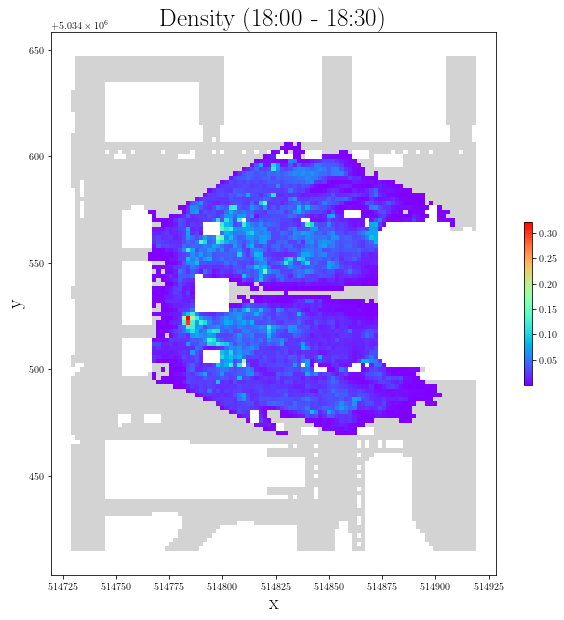

In [ ]:
# plottando la colonna average per ogni cella ho la media dei vari frame

# grid_with_count_new = pd.DataFrame(results_by_min_with_mean.average).merge(grid_duomoo, on='id_left')
import numpy as np
grid_with_count_new['count_log'] = np.log(grid_with_count_new['avg_num_pedoni'])
grid_with_count_new
grid_with_count_new = gpd.GeoDataFrame(grid_with_count_new, 
                          crs = 'epsg:32632', 
                          geometry = grid_with_count_new['geometry'])
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (10,10))

grid_duomo.to_crs(epsg=32632).plot(ax=ax, color='lightgrey')
grid_with_count_new.plot(column = 'avg_num_pedoni', ax=ax, cmap = 'rainbow',legend = True, legend_kwds={'shrink': 0.3}, markersize = 1) #, vmax=1.5)

plt.title('Density {}'.format(datetime_detection), fontsize=25)
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.show()

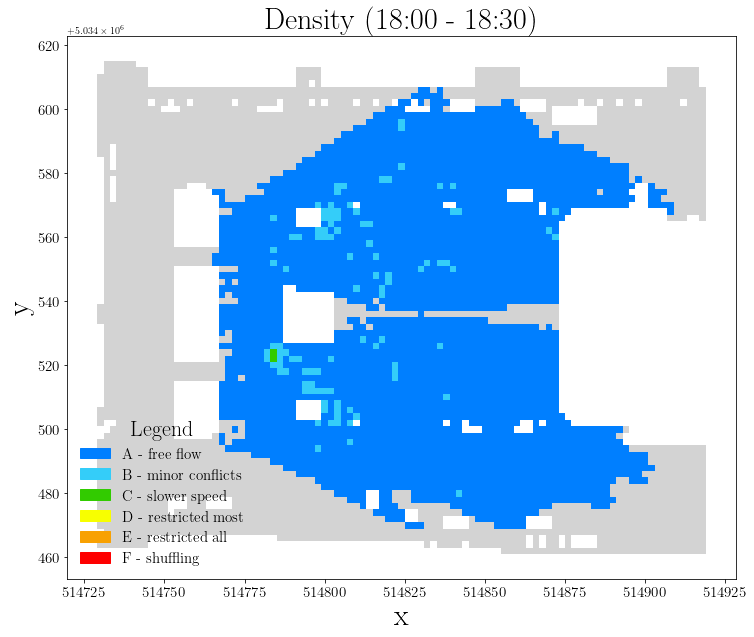

In [ ]:
# mi ricollego alla tabella LOS

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import geopandas as gpd

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
# fig = plt.figure(figsize=(12, 12))

data = grid_with_count_new.copy(deep=True)

# range valori - colori
bounds = [float('-inf'), 0.08, 0.27, 0.45, 0.69, 1.66, float('inf')]
colors_list = ['#007FFF', '#34CDF9', '#32CB00', '#F8FF00', '#F8A102', '#FE0000']
cmap = colors.ListedColormap(colors_list)
norm = colors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots(figsize=(12,12))

# plotto grid Duomo
grid_duomo[1150:6700].to_crs(epsg=32632).plot(ax=ax, color='lightgrey')

# plotto avg_num_pedoni
data.plot(column='avg_num_pedoni', cmap=cmap, norm=norm, ax=ax)

plt.title('Density {}'.format(datetime_detection), fontsize=30)
plt.xlabel('x', fontsize=30)
plt.ylabel('y', fontsize=30)

# legenda
legend_labels = ['A - free flow', 
                 'B - minor conflicts', 
                 'C - slower speed', 
                 'D - restricted most', 
                 'E - restricted all', 
                 'F - shuffling']
legend_handles = [plt.Rectangle((0,0),1,1, color=colors_list[i]) for i in range(len(colors_list))]
ax.legend(legend_handles, legend_labels, title='Legend', loc='lower left', 
          bbox_to_anchor=(0, 0.0), frameon=False, prop={'size': 15}, title_fontsize=22)

ax = plt.gca()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

plt.show()

In [ ]:
fig.savefig('density_{}.png'.format(hour_label), dpi=300, bbox_inches='tight')

In [ ]:
# DENSITY

print('Density (Pedoni/metro quadrato)\nMedia: {}\nDeviazione Standard: {}'.format(round(grid_with_count_new['avg_num_pedoni'].mean(), 3),
                                                                  round(grid_with_count_new['avg_num_pedoni'].std(), 3)
    ))

Density (Pedoni/metro quadrato)
Media: 0.027
Deviazione Standard: 0.025


# Flow Rate: ped/min/m

Si considera il metro lineare, si divide dunque per 2

Viene utilizzati in ambietti più ristretti come corridoi  
Noi abbiamo un ambiente multidirezionale, uno spazio più grande, informale  
Questa metrica funziona nell'ingegneria dei trasporti, per flussi pedonali  
Noi faremo vedere questo valore non funziona in maniera ottimale, esigenza di fare ricerca in questa nicchia



In [ ]:
df_geopandas.head()

,frame,id,class,time,geometry,lon,lat
0,1,0,0,2021-07-15 17:59:31,POINT (514776.927 5034537.259),514776.926865,5.034537e+06
1,1,1,0,2021-07-15 17:59:31,POINT (514807.008 5034514.104),514807.007956,5.034514e+06
2,1,2,0,2021-07-15 17:59:31,POINT (514779.104 5034534.290),514779.103786,5.034534e+06
3,1,3,0,2021-07-15 17:59:31,POINT (514787.811 5034516.281),514787.811470,5.034516e+06
4,1,4,0,2021-07-15 17:59:31,POINT (514788.603 5034516.677),514788.603078,5.034517e+06


In [ ]:
import pandas as pd
points = df_geopandas[['lon', 'lat', 'geometry', 'id', 'frame']]
points = points.rename(columns={'lon': 'x', 'lat': 'y'})

# aggiungo la feature minuti che verrà utilizzata per aggregare i dati sul minuto
min_list = list(range(1,points['frame'].max()+1))  # versione originale: range(1,27862)
def duplicate(testList, n):
  return [ele for ele in testList for _ in range(n)]
min_lsit_new = duplicate(min_list,900) 
frame_list = list(range(1,points['frame'].max()+1))
t = min_lsit_new[:len(frame_list)]   # devo selezionare però solo fino a 30
z = pd.DataFrame({'frame': frame_list})
z['min'] = t  # ogni frame ha il suo minuto associato

points_new = points.merge(z, on='frame', how='left')  # aggiungo la colonna min al dataframe iniziale
points_new

,x,y,geometry,id,frame,min
0,514776.926865,5.034537e+06,POINT (514776.927 5034537.259),0,1,1
1,514807.007956,5.034514e+06,POINT (514807.008 5034514.104),1,1,1
2,514779.103786,5.034534e+06,POINT (514779.104 5034534.290),2,1,1
3,514787.811470,5.034516e+06,POINT (514787.811 5034516.281),3,1,1
4,514788.603078,5.034517e+06,POINT (514788.603 5034516.677),4,1,1
...,...,...,...,...,...,...
9691769,514853.514905,5.034473e+06,POINT (514853.515 5034473.336),268167,27888,31
9691770,514860.243570,5.034568e+06,POINT (514860.244 5034567.538),268168,27888,31
9691771,514860.837276,5.034568e+06,POINT (514860.837 5034568.329),268169,27888,31
9691772,514859.451963,5.034565e+06,POINT (514859.452 5034564.569),268170,27888,31


In [ ]:
grid_duomo
grid_duomoo = grid_duomo.rename(columns = {'id':'id_left'})
grid_duomoo

,Depthmap_R,id_left,geometry
0,5767220,0,"POLYGON ((514729.000 5034415.000, 514729.000 5..."
1,5832756,1,"POLYGON ((514731.000 5034415.000, 514731.000 5..."
2,5898292,2,"POLYGON ((514733.000 5034415.000, 514733.000 5..."
3,5963828,3,"POLYGON ((514735.000 5034415.000, 514735.000 5..."
4,6029364,4,"POLYGON ((514737.000 5034415.000, 514737.000 5..."
...,...,...,...
7282,11665575,7282,"POLYGON ((514909.000 5034645.000, 514909.000 5..."
7283,11731111,7283,"POLYGON ((514911.000 5034645.000, 514911.000 5..."
7284,11796647,7284,"POLYGON ((514913.000 5034645.000, 514913.000 5..."
7285,11862183,7285,"POLYGON ((514915.000 5034645.000, 514915.000 5..."


In [ ]:
import pandas as pd
from geopandas.tools import sjoin
pointInPolys = sjoin(points_new, grid_duomoo, how='left')  
pointInPolys_df = pd.DataFrame(data=pointInPolys)
pointInPolys_df

,x,y,geometry,id,frame,min,index_right,Depthmap_R,id_left
0,514776.926865,5.034537e+06,POINT (514776.927 5034537.259),0,1,1,3941.0,7274609.0,3941.0
1,514807.007956,5.034514e+06,POINT (514807.008 5034514.104),1,1,1,3205.0,8323173.0,3205.0
2,514779.103786,5.034534e+06,POINT (514779.104 5034534.290),2,1,1,3829.0,7405679.0,3829.0
3,514787.811470,5.034516e+06,POINT (514787.811 5034516.281),3,1,1,3266.0,7667814.0,3266.0
4,514788.603078,5.034517e+06,POINT (514788.603 5034516.677),4,1,1,3266.0,7667814.0,3266.0
...,...,...,...,...,...,...,...,...,...
9691769,514853.514905,5.034473e+06,POINT (514853.515 5034473.336),268167,27888,31,1616.0,9830481.0,1616.0
9691770,514860.243570,5.034568e+06,POINT (514860.244 5034567.538),268168,27888,31,4931.0,10027136.0,4931.0
9691771,514860.837276,5.034568e+06,POINT (514860.837 5034568.329),268169,27888,31,4931.0,10027136.0,4931.0
9691772,514859.451963,5.034565e+06,POINT (514859.452 5034564.569),268170,27888,31,4806.0,10027134.0,4806.0


In [ ]:
# in questo caso raggruppo per min e id cella e conto il numero di id unovoci dei pedoni (id)
result_grouped = pointInPolys_df.groupby(['min', 'id_left'])['id'].nunique().reset_index(name='unique_id_count')  
results_by_min = result_grouped.pivot_table(index='id_left', columns='min', values='unique_id_count', fill_value=0)
results_by_min

min,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
id_left,,,,,,,,,,,,,,,,,,,,,
1433.0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,1,1,0,0,0
1434.0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1435.0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1443.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1444.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6487.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6488.0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6580.0,0,1,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# analizzo la distribuzione
results_by_min.sort_values(by=results_by_min.columns.tolist(), ascending=False)

min,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
id_left,,,,,,,,,,,,,,,,,,,,,
4457.0,69,51,11,12,26,25,12,13,11,1,...,7,6,4,10,9,12,10,9,13,6
4331.0,65,42,39,58,67,28,15,19,15,17,...,4,4,16,10,15,22,8,11,10,20
2832.0,62,38,31,24,23,23,20,25,17,42,...,37,33,34,14,23,38,11,47,35,24
3011.0,59,21,32,19,20,15,18,21,27,25,...,30,41,42,30,12,24,16,34,33,34
4673.0,53,49,40,13,24,24,27,3,17,40,...,6,10,9,19,12,7,5,7,1,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5177.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2750.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3836.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


<AxesSubplot:>

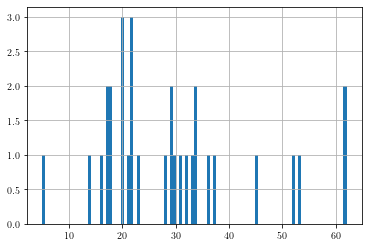

In [ ]:
results_by_min.loc[3668.0].hist(bins=100)

<AxesSubplot:>

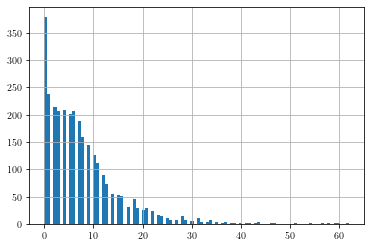

In [ ]:
results_by_min[4].hist(bins=100)

In [ ]:
results_by_min[4].max()

62

In [ ]:
results_by_min.loc[results_by_min[4] == 62]

min,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
id_left,,,,,,,,,,,,,,,,,,,,,
3668.0,36,16,62,62,33,32,22,21,18,53,...,20,22,5,20,31,37,18,29,30,17


In [ ]:
# calcolo media che sarà da dividere per 2

results_by_min_with_mean = results_by_min.copy(deep=True)
results_by_min_with_mean['average'] = results_by_min_with_mean.mean(axis=1)
results_by_min_with_mean

min,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,average
id_left,,,,,,,,,,,,,,,,,,,,,
1433.0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,1,1,0,0,0,0.258065
1434.0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0.064516
1435.0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.032258
1443.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0.032258
1444.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.032258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6487.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.032258
6488.0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0.032258
6580.0,0,1,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.096774


In [ ]:
pd.DataFrame({'id_cella': results_by_min_with_mean.index, 
              'avg_num_pedoni': results_by_min_with_mean['average']}).sort_values(by='avg_num_pedoni', ascending=False)  # è ancora da dividire per 2

,id_cella,avg_num_pedoni
id_left,,
3534.0,3534.0,41.387097
3470.0,3470.0,38.806452
3535.0,3535.0,33.225806
4936.0,4936.0,32.548387
4751.0,4751.0,32.516129
...,...,...
4008.0,4008.0,0.032258
3528.0,3528.0,0.032258
5039.0,5039.0,0.032258


In [ ]:
results_by_min_with_mean['average'].mean(skipna=True)/2  # devo dividire per 2 

3.9707451623552967

In [ ]:
# assoccio nuovamente le coordinate spaziali sulla base degli di delle celle
grid_with_count_new = pd.DataFrame(results_by_min_with_mean.average).merge(grid_duomoo, on='id_left')

# divido per 2 dal momento in cui sto considerando il metro lineare
grid_with_count_new['average'] = grid_with_count_new['average']/2
grid_with_count_new.sort_values(by='average', ascending=False)

,id_left,average,Depthmap_R,geometry
1265,3534.0,20.693548,7536746,"POLYGON ((514783.000 5034523.000, 514783.000 5..."
1214,3470.0,19.403226,7536745,"POLYGON ((514783.000 5034521.000, 514783.000 5..."
1266,3535.0,16.612903,7602282,"POLYGON ((514785.000 5034523.000, 514785.000 5..."
2314,4936.0,16.274194,10420352,"POLYGON ((514871.000 5034567.000, 514871.000 5..."
2168,4751.0,16.258065,10354813,"POLYGON ((514869.000 5034561.000, 514869.000 5..."
...,...,...,...,...
1572,4008.0,0.016129,8519794,"POLYGON ((514813.000 5034539.000, 514813.000 5..."
1259,3528.0,0.016129,7143530,"POLYGON ((514771.000 5034523.000, 514771.000 5..."
2383,5039.0,0.016129,7274626,"POLYGON ((514775.000 5034571.000, 514775.000 5..."
65,1776.0,0.016129,9044051,"POLYGON ((514829.000 5034477.000, 514829.000 5..."


In [ ]:
# flow_8 = grid_with_count_new.loc[:, ['id_left', 'average']].rename(columns={'average': 'avg_num_pedoni_8'})
# flow_8
# flow_8.to_csv('flow_8.csv', index=False)
# !cp /content/flow_8.csv /content/drive/MyDrive/dataframe_points/flow_plot

# flow_11 = grid_with_count_new.loc[:, ['id_left', 'average']].rename(columns={'average': 'avg_num_pedoni_11'})
# flow_11
# flow_11.to_csv('flow_11.csv', index=False)
# !cp /content/flow_11.csv /content/drive/MyDrive/dataframe_points/flow_plot

# flow_12 = grid_with_count_new.loc[:, ['id_left', 'average']].rename(columns={'average': 'avg_num_pedoni_12'})
# flow_12
# flow_12.to_csv('flow_12.csv', index=False)
# !cp /content/flow_12.csv /content/drive/MyDrive/dataframe_points/flow_plot

# flow_15 = grid_with_count_new.loc[:, ['id_left', 'average']].rename(columns={'average': 'avg_num_pedoni_15'})
# flow_15
# flow_15.to_csv('flow_15.csv', index=False)
# !cp /content/flow_15.csv /content/drive/MyDrive/dataframe_points/flow_plot

# flow_18 = grid_with_count_new.loc[:, ['id_left', 'average']].rename(columns={'average': 'avg_num_pedoni_18'})
# flow_18
# flow_18.to_csv('flow_18.csv', index=False)
# !cp /content/flow_18.csv /content/drive/MyDrive/dataframe_points/flow_plot

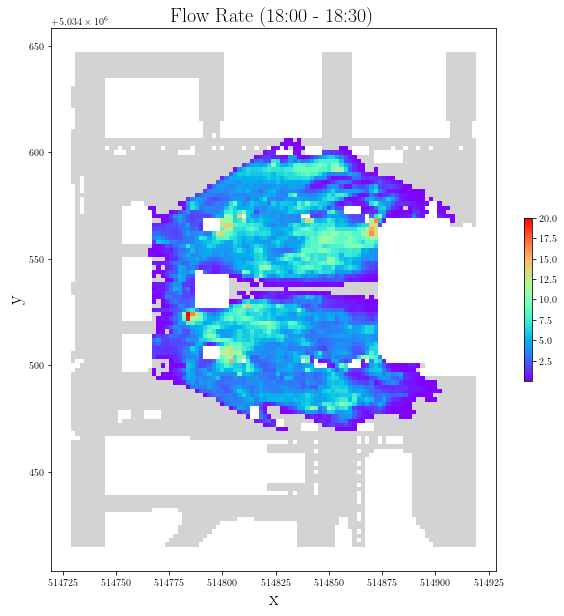

In [ ]:
# import numpy as np
grid_with_count_new['count_log'] = np.log(grid_with_count_new['average'])
grid_with_count_new
grid_with_count_new = gpd.GeoDataFrame(grid_with_count_new, 
                          crs = 'epsg:32632', 
                          geometry = grid_with_count_new['geometry'])
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (10,10))

grid_duomo.to_crs(epsg=32632).plot(ax=ax, color='lightgrey')
grid_with_count_new.plot(column = 'average', ax=ax, cmap = 'rainbow',legend = True, 
                         legend_kwds={'shrink': 0.3}, markersize = 10, vmax=20)

plt.title('Flow Rate {}'.format(datetime_detection), fontsize=20)
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.show()

# plottando la colonna average per ogni cella ho la media dei vari minuti

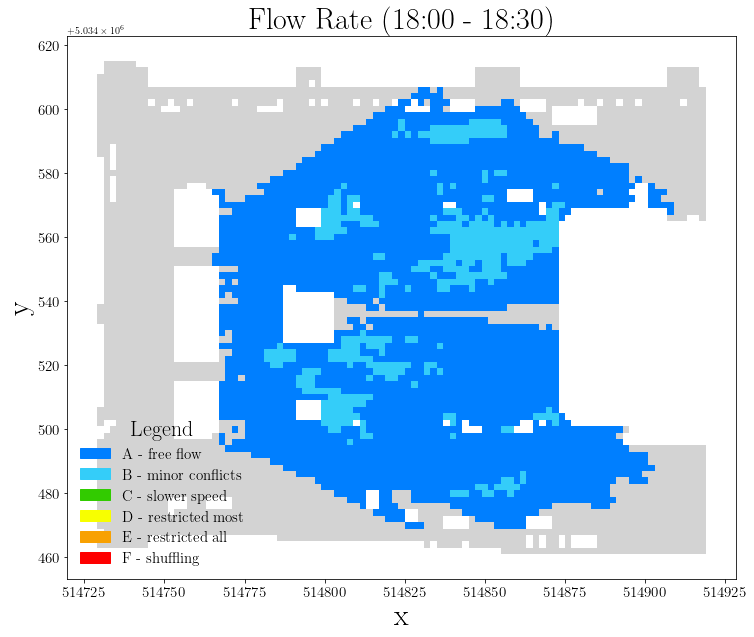

In [ ]:
# mi ricollego alla tabella LOS

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import geopandas as gpd

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
# fig = plt.figure(figsize=(12, 12))

data = grid_with_count_new.copy(deep=True)

bounds = [float('-inf'), 7, 23, 33, 49, 82, float('inf')]
colors_list = ['#007FFF', '#34CDF9', '#32CB00', '#F8FF00', '#F8A102', '#FE0000']

cmap = colors.ListedColormap(colors_list)
norm = colors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots(figsize=(12,12))

# plotto grid Duomo
grid_duomo[1150:6700].to_crs(epsg=32632).plot(ax=ax, color='lightgrey')

# plotto average (numero medio pedoni al minuto per cella)
data.plot(column='average', cmap=cmap, norm=norm, ax=ax)

plt.title('Flow Rate {}'.format(datetime_detection), fontsize=30)
plt.xlabel('x', fontsize=30)
plt.ylabel('y', fontsize=30)

legend_labels = ['A - free flow', 
                 'B - minor conflicts', 
                 'C - slower speed', 
                 'D - restricted most', 
                 'E - restricted all', 
                 'F - shuffling']
legend_handles = [plt.Rectangle((0,0),1,1, color=colors_list[i]) for i in range(len(colors_list))]
ax.legend(legend_handles, legend_labels, title='Legend', loc='lower left', 
          bbox_to_anchor=(0, 0.0), frameon=False, prop={'size': 15}, title_fontsize=22)

ax = plt.gca()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

plt.show()

In [ ]:
fig.savefig('flow_{}.png'.format(hour_label), dpi=300, bbox_inches='tight')

In [ ]:
# FLOW RATE

print('Flow Rate (Pedoni/minuto/metro)\nMedia: {}\nDeviazione Standard: {}'.format(round(grid_with_count_new['average'].mean(), 3),
                                                                  round(grid_with_count_new['average'].std(), 3)
    ))

Flow Rate (Pedoni/minuto/metro)
Media: 3.971
Deviazione Standard: 2.754


In [ ]:
# !pip freeze

In [ ]:
# !pip freeze > requirements.txt

# Average Occupancy, Density, Flow Rate

## Average Occupancy

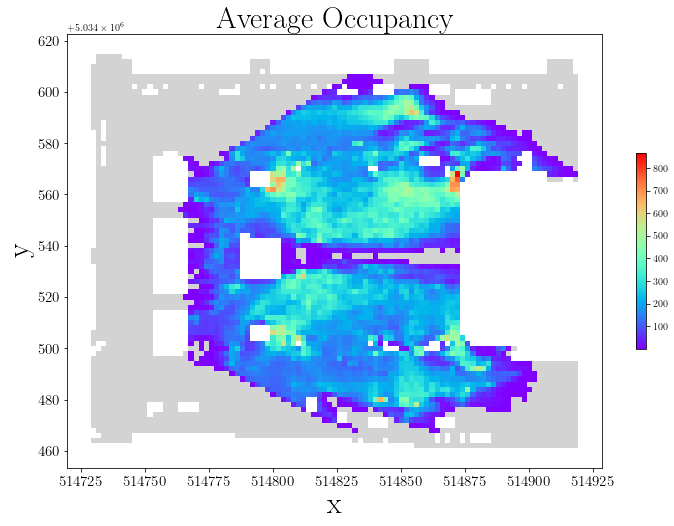

In [ ]:
occupancy_8 = pd.read_csv('/content/drive/MyDrive/dataframe_points/occupancy_plot/occupancy_8.csv')
occupancy_11 = pd.read_csv('/content/drive/MyDrive/dataframe_points/occupancy_plot/occupancy_11.csv')
occupancy_12 = pd.read_csv('/content/drive/MyDrive/dataframe_points/occupancy_plot/occupancy_12.csv')
occupancy_15 = pd.read_csv('/content/drive/MyDrive/dataframe_points/occupancy_plot/occupancy_15.csv')
occupancy_18 = pd.read_csv('/content/drive/MyDrive/dataframe_points/occupancy_plot/occupancy_18.csv')


merged = pd.merge(occupancy_8, occupancy_11, on='id_right', how='outer')
# Unisci i restanti DataFrame con quello precedentemente creato
merged = pd.merge(merged, occupancy_12, on='id_right', how='outer')
merged = pd.merge(merged, occupancy_15, on='id_right', how='outer')
merged = pd.merge(merged, occupancy_18, on='id_right', how='outer')

merged = merged.fillna(0)
# calcolo media generale
merged['avg_occupancy'] = pd.concat([merged['unique_id_count_8'], merged['unique_id_count_11'], 
                    merged['unique_id_count_12'], merged['unique_id_count_15'], 
                    merged['unique_id_count_18']], axis=1).mean(axis=1)

merged = pd.merge(merged, grid_duomo, right_on='id', left_on='id_right', how='left')

import numpy as np

# conversione in geo dataframe
grid_count_geom = gpd.GeoDataFrame(merged, 
                          crs = 'epsg:32632', 
                          geometry = merged['geometry'])
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
# fig = plt.figure(figsize=(12, 12))

fig, ax = plt.subplots(figsize = (12,12))
# plotto la grid Duomo
grid_duomo[1150:6700].to_crs(epsg=32632).plot(ax=ax, color='lightgrey')

# plotto per ogni cella il relativo conteggio utilizzando una scala colori
grid_count_geom.plot(column = 'avg_occupancy',  
                     ax=ax, 
                     cmap = 'rainbow',
                     legend = True, 
                     legend_kwds={'shrink': 0.3}, 
                     markersize = 10)

plt.title('Average Occupancy', fontsize=30)
plt.xlabel('x', fontsize=30)
plt.ylabel('y', fontsize=30)

# Get the axes object
ax = plt.gca()

# Set the tick font size
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

plt.show()

In [ ]:
fig.savefig('avg_occupancy.png', dpi=300, bbox_inches='tight')

In [ ]:
# AVERAGE OCCUPANCY 

print('Average Occupancy (Pedoni/minuto)\nMedia: {}\nDeviazione Standard: {}'.format(round(grid_count_geom['avg_occupancy'].mean(), 3),
                                                                  round(grid_count_geom['avg_occupancy'].std(), 3)
    ))

Average Occupancy (Pedoni/minuto)
Media: 180.495
Deviazione Standard: 120.534


## Average Density

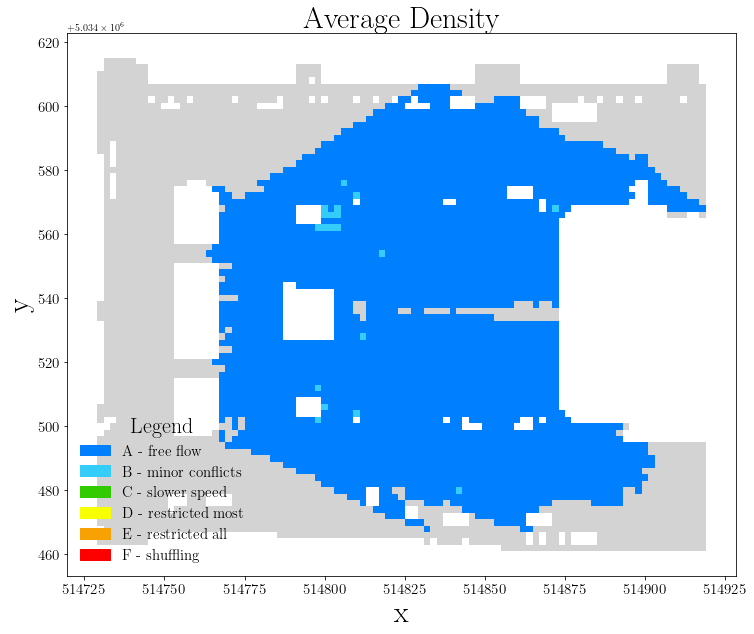

In [ ]:
# mi ricollego alla tabella LOS

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import geopandas as gpd

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
# fig = plt.figure(figsize=(12, 12))

density_8 = pd.read_csv('/content/drive/MyDrive/dataframe_points/density_plot/density_8.csv')
density_11 = pd.read_csv('/content/drive/MyDrive/dataframe_points/density_plot/density_11.csv')
density_12 = pd.read_csv('/content/drive/MyDrive/dataframe_points/density_plot/density_12.csv')
density_15 = pd.read_csv('/content/drive/MyDrive/dataframe_points/density_plot/density_15.csv')
density_18 = pd.read_csv('/content/drive/MyDrive/dataframe_points/density_plot/density_18.csv')


merged = pd.merge(density_8, density_11, on='id', how='outer')
# Unisci i restanti DataFrame con quello precedentemente creato
merged = pd.merge(merged, density_12, on='id', how='outer')
merged = pd.merge(merged, density_15, on='id', how='outer')
merged = pd.merge(merged, density_18, on='id', how='outer')

merged = merged.fillna(0)
# calcolo media generale
merged['avg_density'] = pd.concat([merged['avg_num_pedoni_8'], merged['avg_num_pedoni_11'], 
                    merged['avg_num_pedoni_12'], merged['avg_num_pedoni_15'], 
                    merged['avg_num_pedoni_18']], axis=1).mean(axis=1)

merged = pd.merge(merged, grid_duomo, on='id', how='left')

import numpy as np

# conversione in geo dataframe
grid_count_geom = gpd.GeoDataFrame(merged, 
                          crs = 'epsg:32632', 
                          geometry = merged['geometry'])

data = grid_count_geom.copy(deep=True)

# range valori - colori
bounds = [float('-inf'), 0.08, 0.27, 0.45, 0.69, 1.66, float('inf')]
colors_list = ['#007FFF', '#34CDF9', '#32CB00', '#F8FF00', '#F8A102', '#FE0000']
cmap = colors.ListedColormap(colors_list)
norm = colors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots(figsize=(12,12))

# plotto grid Duomo
grid_duomo[1150:6700].to_crs(epsg=32632).plot(ax=ax, color='lightgrey')

# plotto avg_num_pedoni
data.plot(column='avg_density', cmap=cmap, norm=norm, ax=ax)

plt.title('Average Density', fontsize=30)
plt.xlabel('x', fontsize=30)
plt.ylabel('y', fontsize=30)

# legenda
legend_labels = ['A - free flow', 
                 'B - minor conflicts', 
                 'C - slower speed', 
                 'D - restricted most', 
                 'E - restricted all', 
                 'F - shuffling']
legend_handles = [plt.Rectangle((0,0),1,1, color=colors_list[i]) for i in range(len(colors_list))]
ax.legend(legend_handles, legend_labels, title='Legend', loc='lower left', 
          bbox_to_anchor=(0, 0.0), frameon=False, prop={'size': 15}, title_fontsize=22)

ax = plt.gca()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

plt.show()

In [ ]:
fig.savefig('avg_density.png', dpi=300, bbox_inches='tight')

In [ ]:
# AVERAGE DENSITY

print('Average Density (Pedoni/metro quadrato)\nMedia: {}\nDeviazione Standard: {}'.format(round(data['avg_density'].mean(), 3),
                                                                  round(data['avg_density'].std(), 3)
    ))

Average Density (Pedoni/metro quadrato)
Media: 0.021
Deviazione Standard: 0.017


## Average Flow Rate

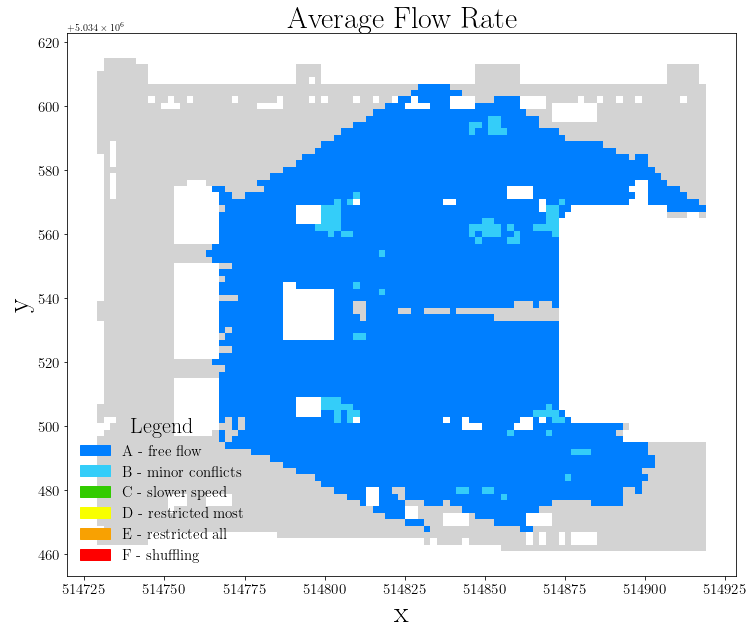

In [ ]:
# mi ricollego alla tabella LOS

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import geopandas as gpd

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
# fig = plt.figure(figsize=(12, 12))

flow_8 = pd.read_csv('/content/drive/MyDrive/dataframe_points/flow_plot/flow_8.csv')
flow_11 = pd.read_csv('/content/drive/MyDrive/dataframe_points/flow_plot/flow_11.csv')
flow_12 = pd.read_csv('/content/drive/MyDrive/dataframe_points/flow_plot/flow_12.csv')
flow_15 = pd.read_csv('/content/drive/MyDrive/dataframe_points/flow_plot/flow_15.csv')
flow_18 = pd.read_csv('/content/drive/MyDrive/dataframe_points/flow_plot/flow_18.csv')


merged = pd.merge(flow_8, flow_11, on='id_left', how='outer')
# Unisci i restanti DataFrame con quello precedentemente creato
merged = pd.merge(merged, flow_12, on='id_left', how='outer')
merged = pd.merge(merged, flow_15, on='id_left', how='outer')
merged = pd.merge(merged, flow_18, on='id_left', how='outer')

merged = merged.fillna(0)
# calcolo media generale
merged['avg_flow'] = pd.concat([merged['avg_num_pedoni_8'], merged['avg_num_pedoni_11'], 
                    merged['avg_num_pedoni_12'], merged['avg_num_pedoni_15'], 
                    merged['avg_num_pedoni_18']], axis=1).mean(axis=1)

merged = pd.merge(merged, grid_duomo, right_on='id', left_on='id_left', how='left')

import numpy as np

# conversione in geo dataframe
grid_count_geom = gpd.GeoDataFrame(merged, 
                          crs = 'epsg:32632', 
                          geometry = merged['geometry'])

data = grid_count_geom.copy(deep=True)

# range valori - colori
bounds = [float('-inf'), 7, 23, 33, 49, 82, float('inf')]
colors_list = ['#007FFF', '#34CDF9', '#32CB00', '#F8FF00', '#F8A102', '#FE0000']
cmap = colors.ListedColormap(colors_list)
norm = colors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots(figsize=(12,12))

# plotto grid Duomo
grid_duomo[1150:6700].to_crs(epsg=32632).plot(ax=ax, color='lightgrey')

# plotto avg_num_pedoni
data.plot(column='avg_flow', cmap=cmap, norm=norm, ax=ax)

plt.title('Average Flow Rate', fontsize=30)
plt.xlabel('x', fontsize=30)
plt.ylabel('y', fontsize=30)

# legenda
legend_labels = ['A - free flow', 
                 'B - minor conflicts', 
                 'C - slower speed', 
                 'D - restricted most', 
                 'E - restricted all', 
                 'F - shuffling']
legend_handles = [plt.Rectangle((0,0),1,1, color=colors_list[i]) for i in range(len(colors_list))]
ax.legend(legend_handles, legend_labels, title='Legend', loc='lower left', 
          bbox_to_anchor=(0, 0.0), frameon=False, prop={'size': 15}, title_fontsize=22)

ax = plt.gca()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

plt.show()

In [ ]:
fig.savefig('avg_flow.png', dpi=300, bbox_inches='tight')

In [ ]:
# AVERAGE FLOW RATE

print('Average Flow Rate (Pedoni/minuto/metro)\nMedia: {}\nDeviazione Standard: {}'.format(round(data['avg_flow'].mean(), 3),
                                                                  round(data['avg_flow'].std(), 3)
    ))

Average Flow Rate (Pedoni/minuto/metro)
Media: 2.949
Deviazione Standard: 1.973


In [ ]:
!pip freeze

absl-py==1.4.0
aeppl==0.0.33
aesara==2.7.9
aiohttp==3.8.4
aiosignal==1.3.1
alabaster==0.7.13
albumentations==1.2.1
altair==4.2.2
appdirs==1.4.4
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
arviz==0.12.1
astor==0.8.1
astropy==4.3.1
astunparse==1.6.3
async-timeout==4.0.2
atari-py==0.2.9
atomicwrites==1.4.1
attrs==22.2.0
audioread==3.0.0
autograd==1.5
Babel==2.11.0
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==6.0.0
blis==0.7.9
bokeh==2.4.3
branca==0.6.0
bs4==0.0.1
CacheControl==0.12.11
cachetools==5.3.0
catalogue==2.0.8
certifi==2022.12.7
cffi==1.15.1
cftime==1.6.2
chardet==4.0.0
charset-normalizer==3.0.1
click==8.1.3
click-plugins==1.1.1
cligj==0.7.2
clikit==0.6.2
cloudpickle==2.2.1
cmake==3.22.6
cmdstanpy==1.1.0
colorcet==3.0.1
colorlover==0.3.0
community==1.0.0b1
confection==0.0.4
cons==0.4.5
contextlib2==0.5.5
convertdate==2.4.0
crashtest==0.3.1
crcmod==1.7
cufflinks==0.17.3
cvxopt==1.3.0
cvxpy==1.2.3
cycler==0.11.0
cymem==2.0.7
Cython==0.29.33
daft==0.0.4
dask==2022.2.1
datascie

In [ ]:
# !pip freeze > requirements.txt